<a href="https://colab.research.google.com/github/themysterysolver/ML-Learn/blob/main/LAB/WEEK-8/LDA_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [26]:
import seaborn as sns

In [37]:
iris=load_iris()

In [38]:
X=iris.data
y=iris.target

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,test_size=0.2) #test_size 20% is choose for testing purpose

In [40]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<Axes: >

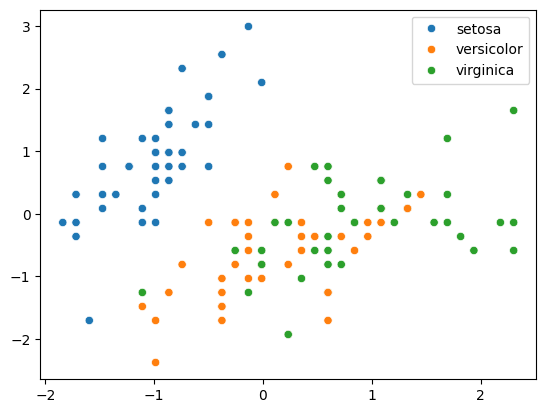

In [42]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1],hue=iris.target_names[Y_train])

In [23]:
lda=LinearDiscriminantAnalysis(n_components=2)
x_train_data=lda.fit_transform(X_train_scaled,Y_train)
x_test_data=lda.transform(X_test_scaled)

<Axes: >

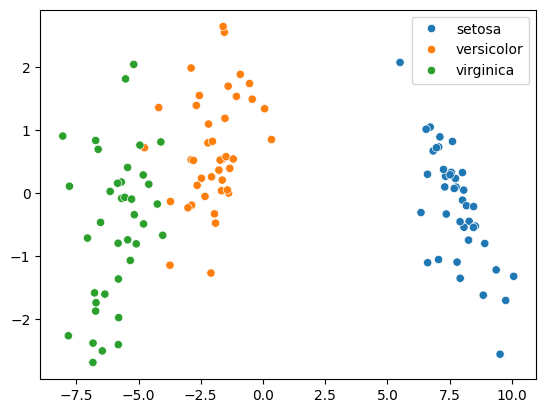

In [36]:
sns.scatterplot(x=x_train_data[:,0],y=x_train_data[:,1],hue=iris.target_names[Y_train])

In [45]:
model=LogisticRegression()
model.fit(x_train_data,Y_train)

LogisticRegression()

In [46]:
y_pred=model.predict(x_test_data)

In [50]:
print(accuracy_score(Y_test,y_pred),precision_score(Y_test,y_pred,average='macro'),recall_score(Y_test,y_pred,average='macro'),f1_score(Y_test,y_pred,average='macro'))

1.0 1.0 1.0 1.0


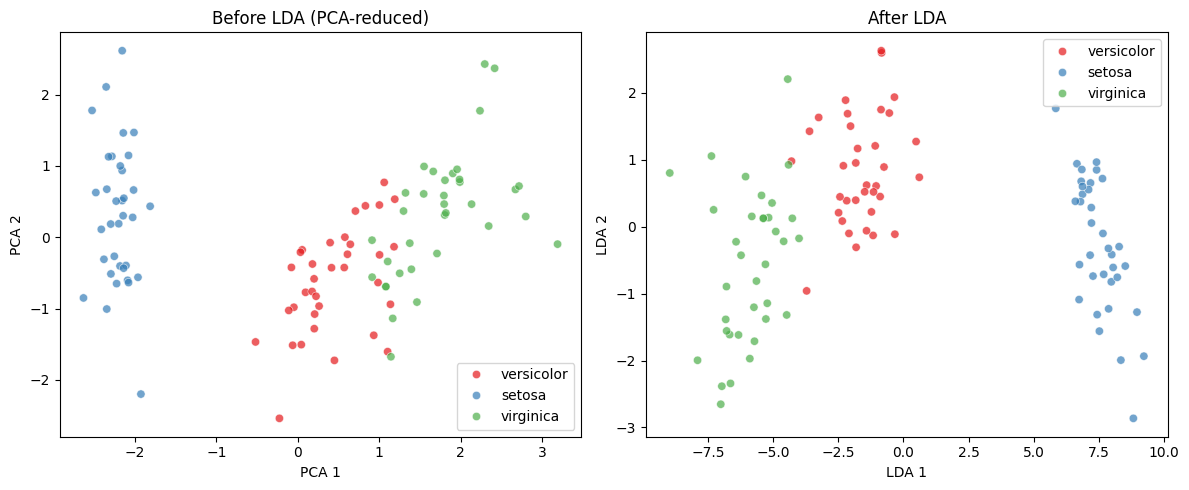

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load and split the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- BEFORE LDA: Use PCA for 2D visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# --- AFTER LDA ---
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train_scaled, y_train)

# === PLOT ===

plt.figure(figsize=(12, 5))

# Before LDA (PCA space)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y_train], palette="Set1", alpha=0.7)
plt.title("Before LDA (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# After LDA
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=iris.target_names[y_train], palette="Set1", alpha=0.7)
plt.title("After LDA")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")

plt.tight_layout()
plt.show()
